In [9]:
# %matplotlib nbagg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from glob import glob

from ase.io import lammpsdata, read
import os

from analyze.lmp.get_depth_profile import get_depth_profile

x_width = round(5.43 * 7.5, 2)
y_width = round(5.43 * 7.5, 2)
z_width = round(5.43 * 15.0, 2)
upper_limit = 5.43 * 17.5

In [10]:
path2data = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/atom6750/model07/0deg_100eV'
# path2data = '/Users/y1u0d2/desktop/Lab/result/lammps/Ni/Ni_self'
pathes = glob(f'{path2data}/data.Si.*')
pathes.sort()
print(len(pathes))

372


In [11]:
from pymatgen.io.lammps.outputs import parse_lammps_dumps
structures = parse_lammps_dumps(os.path.join(path2data, 'dump.lammpstrj'))

In [12]:
result = []
box = []
for i, structure in enumerate(structures):
    if i > 1:
        break
    # print(structure.natoms)
    print(structure.timestep)
    result.append(structure.data)
    box.append(structure.box)

0
500


In [13]:
result[0]

,id,type,xs,ys,zs
0,1,1,0.000133,0.000133,0.000057
1,2,1,0.000133,0.066800,0.028629
2,3,1,0.066800,0.000133,0.028629
3,4,1,0.066800,0.066800,0.000057
4,5,1,0.033467,0.033467,0.014343
...,...,...,...,...,...
6745,6731,1,0.900133,0.900133,0.814343
6746,6735,1,0.966800,0.900133,0.842914
6747,6748,1,0.900133,0.966800,0.842914
6748,6749,1,0.933467,0.933467,0.800057


In [14]:
box[0].to_lattice().abc

(40.724999999999994, 40.724999999999994, 95.02499999999999)

In [15]:
lattice_tuple = box[0].to_lattice().abc
position_z = result[0]['zs'] * lattice_tuple[2]
position_z.values

lattice_tuple = box[1].to_lattice().abc
position_z500 = result[1]['zs'] * lattice_tuple[2]
position_z500.values

array([5.43000407e-03, 2.72043271e+00, 2.72043271e+00, ...,
       7.75492373e+01, 8.02967902e+01, 7.99177354e+01])

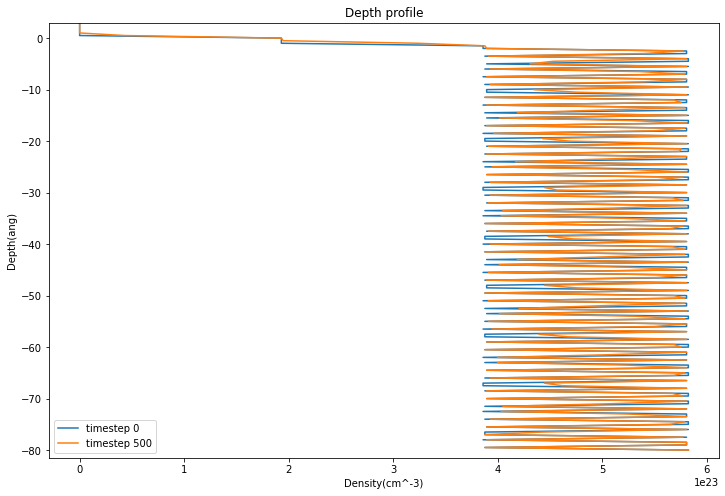

In [16]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.set_title('Depth profile')
ax.set_xlabel('Density(cm^-3)')
ax.set_ylabel('Depth(ang)')
ax.set_ylim(-z_width, 3)

df = get_depth_profile(position_z.values, x_width=x_width, y_width=y_width, z_width=z_width)
ax.plot(df['ma'], df['linspace'], label='timestep 0')

df = get_depth_profile(position_z500.values, x_width=x_width, y_width=y_width, z_width=z_width)
ax.plot(df['ma'], df['linspace'], label='timestep 500')

# df = get_depth_profile(, x_width=x_width, y_width=y_width, z_width=z_width)
# ax.plot(df['ma'], df['linspace'])

ax.legend()